<h1>PREDICTING STUDENTS’ ACADEMIC PERFORMANCE USING 
ARTIFICIAL NEURAL NETWORK</h1>

<h2>Introduction</h2>
<p>The proposed system is the prediction of students’ academic performance using Artificial Neural 
Network (ANN). The objective of this project is to forecast the academic performance of students 
during admission process so as to help lecturers and academic institutions better identify students 
at risk of failing and adopt corresponding supportive measures, thereby ensuring that student 
successfully complete their academic cycle, which in turn helps the institution garner prestige.</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

    
1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Cleaning](#DataCleaning)
5. [Exploratory Data Analysis](#EDA)
6. [Feature Engineering/Data Normalization](#Feature)
7. [Model Building](#Modelling)
    

<a name="Libraries"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>1. Importing libraries</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<a name="Data"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>2. Loading data</b>

In [2]:
# Reading the dataset
df = pd.read_csv(r'C:\Users\ADMIN\Documents\bukola\student-mat.csv')

In [3]:
# Head function will show us the top records of the dataset. By default python shows the top 5 records.
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [4]:
# Tail function will show you the last 5 records of the dataset.
df.tail()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]

<a name="Statistics"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>3. Statistical summaries</b>

In [5]:
# It returns the column labels of the given dataframe.
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
# Identifying the datatype for every Variable
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Columns	Description
**school**	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

**sex** student's sex (binary: 'F' - female or 'M' - male)

**age**	student's age (numeric: from 15 to 22)

**address**	student's home address type (binary: 'U' - urban or 'R' - rural)

**famsize**	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

**Pstatus**	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

**Medu**	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

**Fedu**	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

**Mjob**	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**Fjob**	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

**reason**	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
guardian	student's guardian (nominal: 'mother', 'father' or 'other')

**traveltime**	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

**studytime**	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

**failures**	number of past class failures (numeric: n if 1<=n<3, else 4)

**schoolsup**	extra educational support (binary: yes or no)

**famsup**	family educational support (binary: yes or no)

**paid**	extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

**activities**	extra-curricular activities (binary: yes or no)

**nursery**	attended nursery school (binary: yes or no)

**higher**	wants to take higher education (binary: yes or no)

**internet**	Internet access at home (binary: yes or no)

**romantic**	with a romantic relationship (binary: yes or no)

**famrel**	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

**freetime**	free time after school (numeric: from 1 - very low to 5 - very high)

**goout**	going out with friends (numeric: from 1 - very low to 5 - very high)

**Dalc**	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

**Walc**	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

**health**	current health status (numeric: from 1 - very bad to 5 - very good)

**absences**	number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese:
Grade	Description

**G1**	first period grade (numeric: from 0 to 20)

**G2**	second period grade (numeric: from 0 to 20)

**G3**	final grade (numeric: from 0 to 20, output target)

<a name="DataCleaning"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>4. Data Cleaning</b>

In [7]:
# Using df.info() to check if any null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.
df.describe(include = "all")

school  sex         age address famsize Pstatus        Medu  \
count     395  395  395.000000     395     395     395  395.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      349  208         NaN     307     281     354         NaN   
mean      NaN  NaN   16.696203     NaN     NaN     NaN    2.749367   
std       NaN  NaN    1.276043     NaN     NaN     NaN    1.094735   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    3.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ...      famrel    freetime       goout  \
count   395.000000    395    395  ...  395.000000  395.000000  395.000000   
unique         NaN      5      5  ...         NaN         NaN         NaN   
top            NaN  other  other  ...         NaN         NaN         NaN   
freq           NaN    141    217  ...         NaN         NaN         NaN   
mean      2.521519    NaN    NaN  ...    3.944304    3.235443    3.108861   
std       1.088201    NaN    NaN  ...    0.896659    0.998862    1.113278   
min       0.000000    NaN    NaN  ...    1.000000    1.000000    1.000000   
25%       2.000000    NaN    NaN  ...    4.000000    3.000000    2.000000   
50%       2.000000    NaN    NaN  ...    4.000000    3.000000    3.000000   
75%       3.000000    NaN    NaN  ...    5.000000    4.000000    4.000000   
max       4.000000    NaN    NaN  ...    5.000000    5.000000    5.000000   

              Dalc        Walc      health    absences          G1  \
count   395.000000  395.000000  395.000000  395.000000  395.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      1.481013    2.291139    3.554430    5.708861   10.908861   
std       0.890741    1.287897    1.390303    8.003096    3.319195   
min       1.000000    1.000000    1.000000    0.000000    3.000000   
25%       1.000000    1.000000    3.000000    0.000000    8.000000   
50%       1.000000    2.000000    4.000000    4.000000   11.000000   
75%       2.000000    3.000000    5.000000    8.000000   13.000000   
max       5.000000    5.000000    5.000000   75.000000   19.000000   

                G2          G3  
count   395.000000  395.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean     10.713924   10.415190  
std       3.761505    4.581443  
min       0.000000    0.000000  
25%       9.000000    8.000000  
50%      11.000000   11.000000  
75%      13.000000   14.000000  
max      19.000000   20.000000  

[11 rows x 33 columns]

In [9]:
# We will check for any duplicate records in the data. We will remove this data from the data set so that we get only distinct records.
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]

<h3>Creating a column cumm_G as part of data cleaning which represents the cumulative marks obtained by students in G1,G2,G3 that can be used a target variable.</h3>

In [10]:
df['cumm_G']=df['G3']+df['G2']+df['G1']
#df.drop('cumm_G',inplace=True,axis=1)

<a name="EDA"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>5. Exploratory Data Analysis</b>
<h3>1. To check distribution for all the variables in the data<h3>

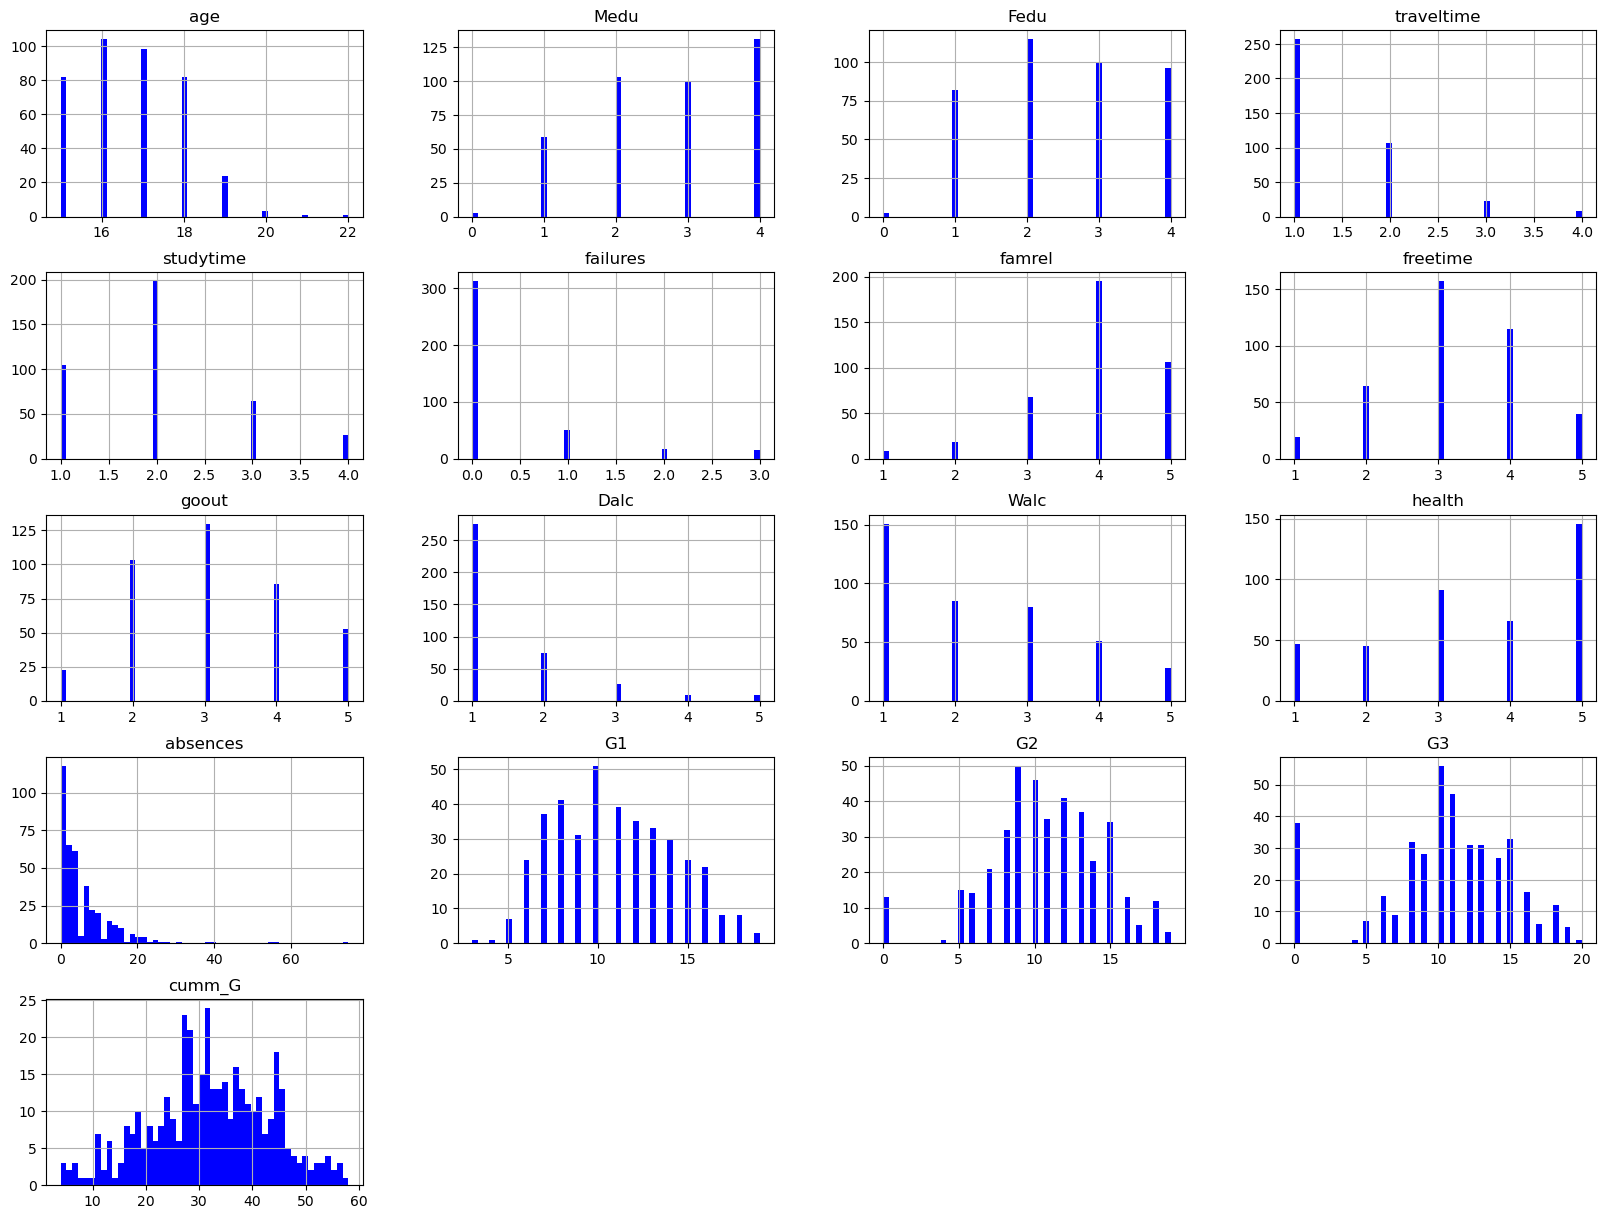

In [11]:
#By plotting Histograms for all the variable
df.hist(bins=50, figsize=(20,15), color='b')
plt.show()
# Colclusion: Scores are normally distributes and absences are right skewed

<h3>2. To check the no. of males vs females in the dataset using value_counts() and countplot()</h3>

In [12]:
df['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

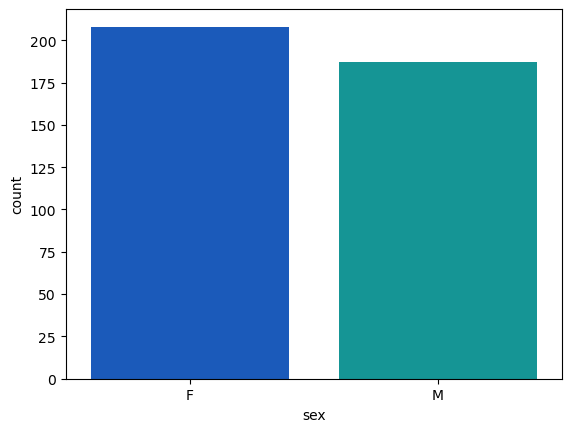

In [13]:
sns.countplot(x=df['sex'],palette='winter')
# Conclusion - Females are more than males in the dataset

<h3>3. To check students of which school are scoring more</h3>

<Axes: xlabel='school', ylabel='cumm_G'>

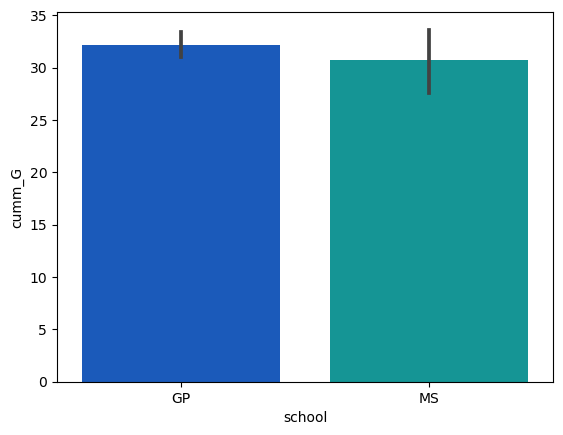

In [14]:
sns.barplot(x='school',y='cumm_G',data=df, palette='winter')
# Conclusion - Students of GP school are performing better than MS school

<h3>4. To check students from which gender are scoring more</h3>

<Axes: xlabel='school', ylabel='cumm_G'>

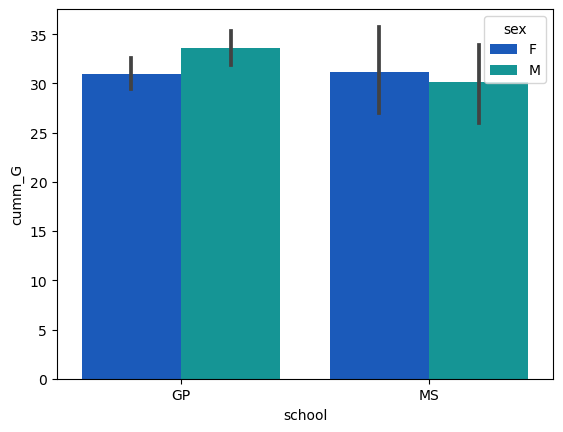

In [15]:
sns.barplot(x='school',y='cumm_G',data=df, hue='sex', palette='winter')
# Conclusion - In GP school male students are performing better while in MS school female students are performing better

<Axes: xlabel='sex', ylabel='cumm_G'>

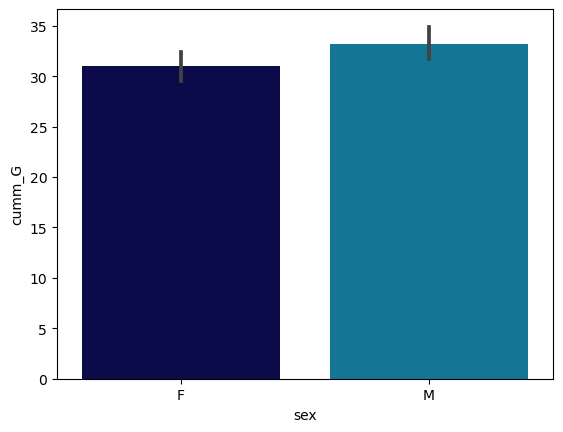

In [16]:
sns.barplot(x='sex',y='cumm_G',data=df, palette='ocean')
# Conclusion - Male students are performing better than female students

<h3>5. To check Students of which age are scoring more</h3>

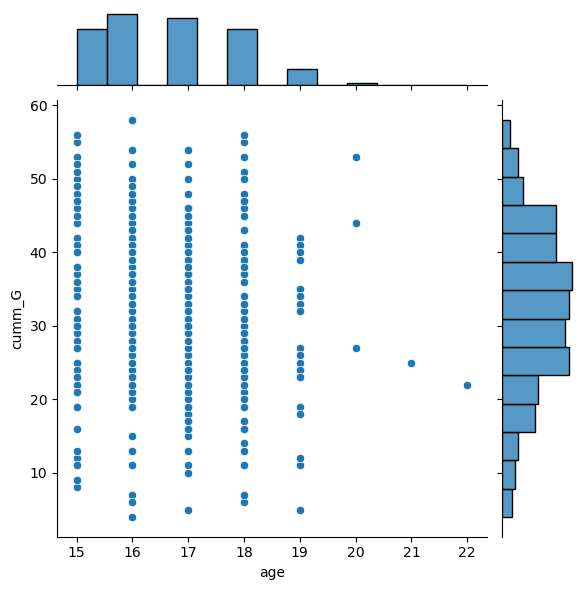

In [17]:
sns.jointplot(x='age',y='cumm_G',data=df)
# Students in the age group of 15-18 are scoring more than the students in the age group of 19-22.

<h3>6. To Check the no. of students having a family of greater than three and less than three members</h3>

In [18]:
 df['famsize'].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

<h3>7. To check can family size effect the score</h3>

<Axes: xlabel='famsize', ylabel='cumm_G'>

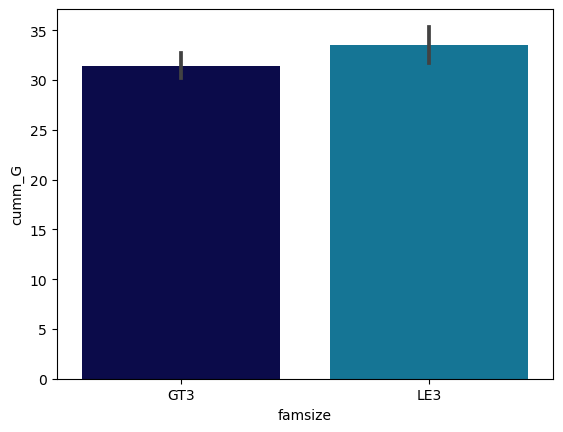

In [19]:
sns.barplot(x='famsize',y='cumm_G',data=df,palette='ocean')
# Conclusion - Yes students having family of less thant three members are performing slightly better

<h3>8. To check can parents marital status affect the marks</h3>

<Axes: xlabel='Pstatus', ylabel='cumm_G'>

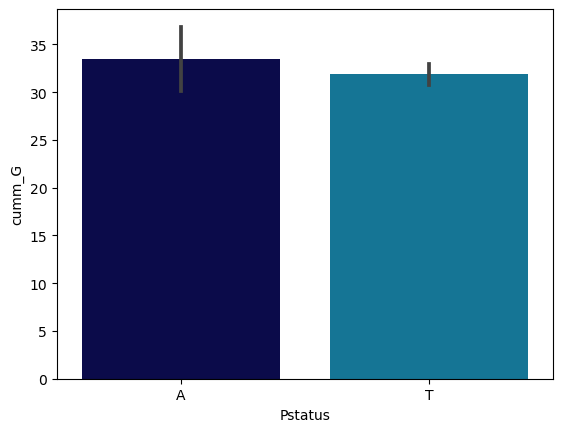

In [20]:
sns.barplot(x='Pstatus',y='cumm_G',data=df,palette='ocean')
# Coclusion - Yes students whose parents are apart are performing slight better
# A - Apart , T - Together

<h3>9. To check can parents education affect the marks</h3>

<Axes: xlabel='Fedu', ylabel='Medu'>

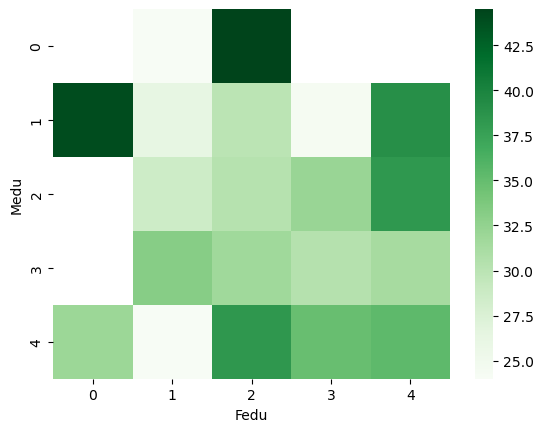

In [21]:
df4=df.pivot_table(index='Medu',columns='Fedu',values='cumm_G')
sns.heatmap(df4,cmap="Greens")
# Conclusion - Students whose mother and father are least educated are scoring the most
# 0-5 is the education scale of parents here 

<h3>10. To check whether parents job can affect the marks</h3>

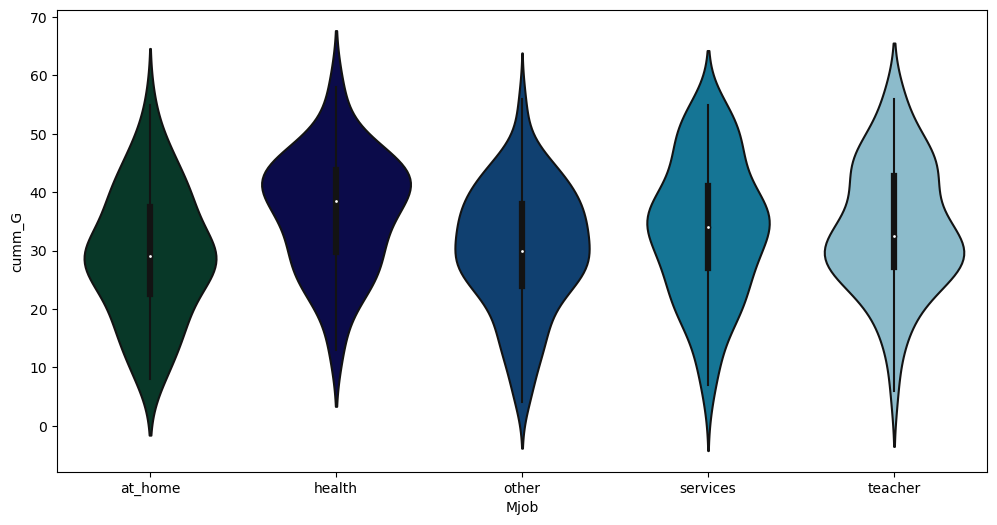

In [22]:
plt.figure(figsize=(12,6))
c=sns.violinplot(x="Mjob", y="cumm_G", data=df, palette = 'ocean')
#Conclusion - Students whose mother's job is in the health sector are getting higher marks mostly in the range of 40+ and class
#class toppers are also those whose mother's job is in health sector. 

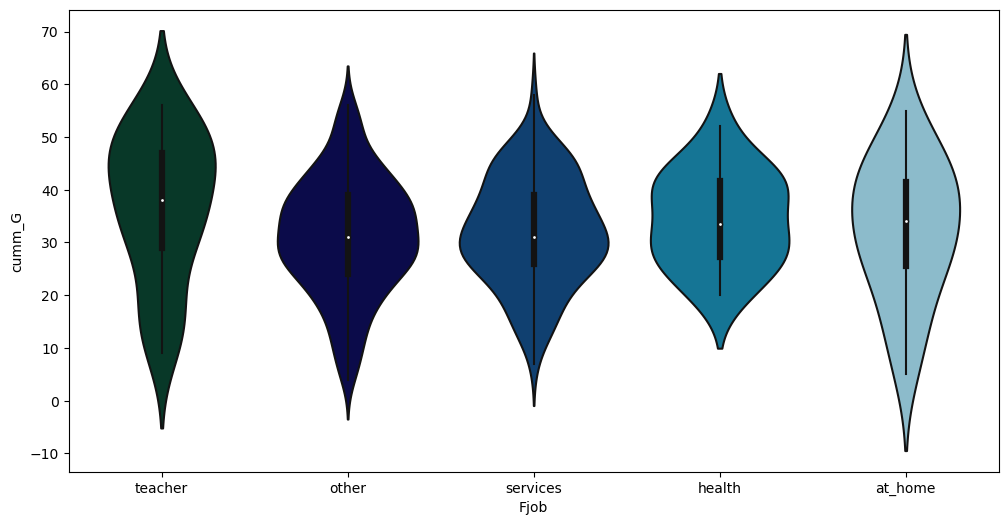

In [23]:
plt.figure(figsize=(12,6))
b=sns.violinplot(x="Fjob", y="cumm_G", data=df, palette = 'ocean')
#Conclusion - Students whose father's job is in the teaching sector are getting higher marks mostly in the range of 40+ and class
#class toppers are also those whose father's job is in teaching sector. 

<Axes: xlabel='Mjob', ylabel='Fjob'>

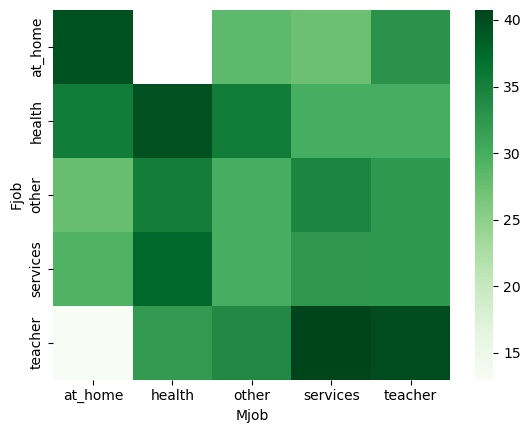

In [24]:
df3=df.pivot_table(index='Fjob',columns='Mjob',values='cumm_G')
sns.heatmap(df3,cmap="Greens")
#Conclusion - As per the heat map Students whose father's job is in the teaching sector and mother's job is of a home maker are
#getting the least marks while Students whose father is a home maker and mother's job is in the health sector are scoring the 
#highest marks.

<h3>11. To understand the relationship between internet access and co-curricular activities and how it can impcat study hours and marks</h3>

<Axes: xlabel='activities', ylabel='internet'>

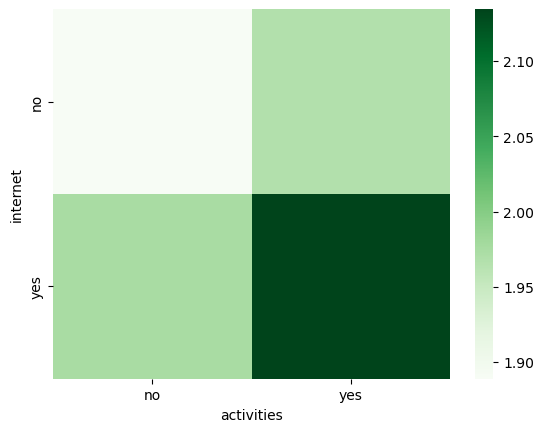

In [25]:
df1=df.pivot_table(index='internet',columns='activities',values='studytime')
sns.heatmap(df1,cmap="Greens")
# Conclusion - Those who participate in activities and have internet access have the highest study hours while those who do not 
#who do not have internet access and doesn't participate in activities have the least study hours.

<Axes: xlabel='activities', ylabel='internet'>

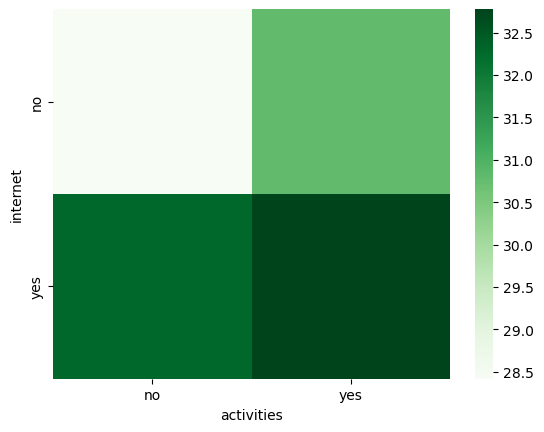

In [26]:
df2=df.pivot_table(index='internet',columns='activities',values='cumm_G')
sns.heatmap(df2,cmap="Greens")
# Conclusion - Those who participate in activities and have internet access are scoring the highest marks while those who do
#not who do not have internet access and doesn't participate in activities are scoring the least.

<h3>12. To understand how study hours can impact the marks</h3>

<Axes: xlabel='studytime', ylabel='cumm_G'>

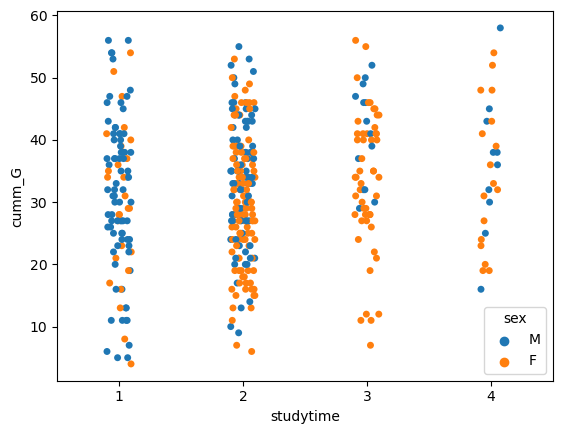

In [27]:
sns.stripplot(x='studytime',y='cumm_G',data=df,hue='sex',jitter=True)
#Conclusion - Most of the students are studying for 2 hours but students who have more study hours are scoring higher.

<h3>13. To understand how much relationships can impact marks and absences</h3>

<Axes: xlabel='romantic', ylabel='famrel'>

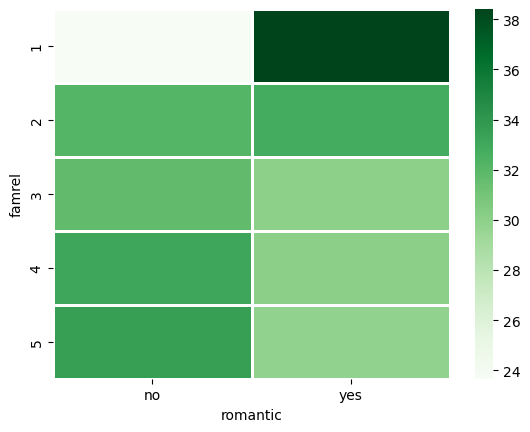

In [28]:
# relationhips can affect marks
df8=df.pivot_table(index='famrel',columns='romantic',values='cumm_G')
sns.heatmap(df8,linewidth=1,cmap="Greens")
# Conclusion - 1. Those who are not romantic and not have good family relation are scoring the least marks.
# 2. Those who are romantic and not have good family relation are scoring the highest marks.

<Axes: xlabel='romantic', ylabel='famrel'>

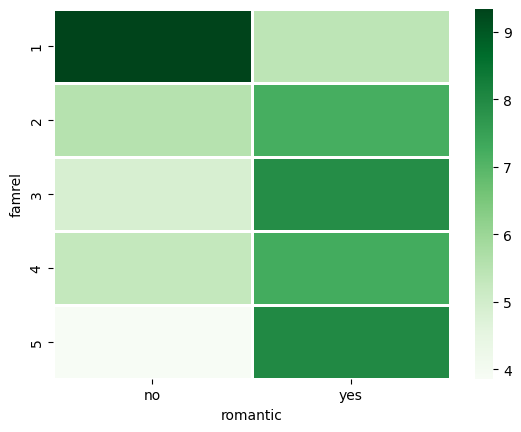

In [29]:
df10=df.pivot_table(index='famrel',columns='romantic',values='absences')
sns.heatmap(df10,linewidth=1,cmap="Greens")
# Conclusion - 1. Those who are not romantic and not have good family relation are having lot of absences in the class.
# 2. Those who are not romantic but have good family relation are having least absences in the class.

<h3>14. To analyze how much free time and going out can impact marks</h3>

<Axes: xlabel='goout', ylabel='freetime'>

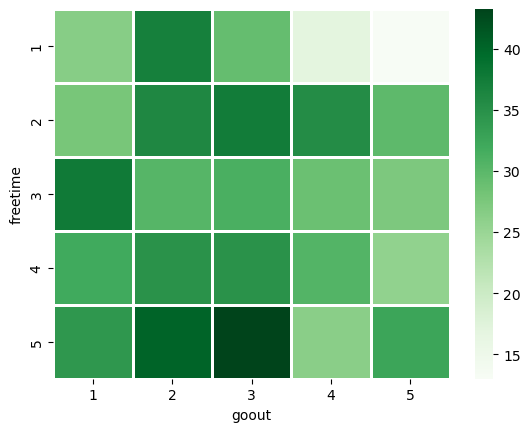

In [30]:
df11=df.pivot_table(index='freetime',columns='goout',values='cumm_G')
sns.heatmap(df11,linewidth=1,cmap="Greens")
# Conclusion - Students who have least free time but go out for long hours, scores least in exams.

<Axes: xlabel='freetime', ylabel='cumm_G'>

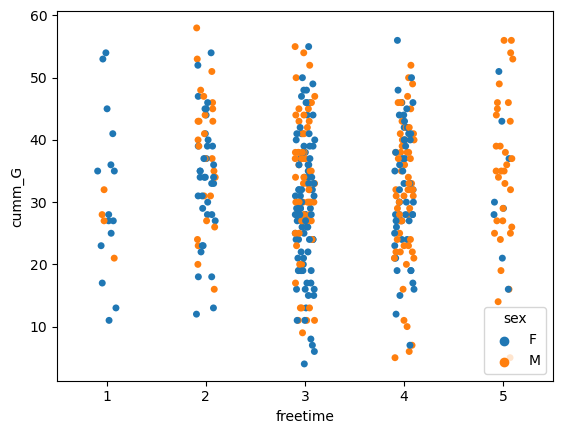

In [31]:
sns.stripplot(x='freetime',y='cumm_G',data=df,hue='sex',jitter=True)
# Conclusion - Most of the students have 3 hours of free time and those who have 2 hours of free time, scores higher in exams.

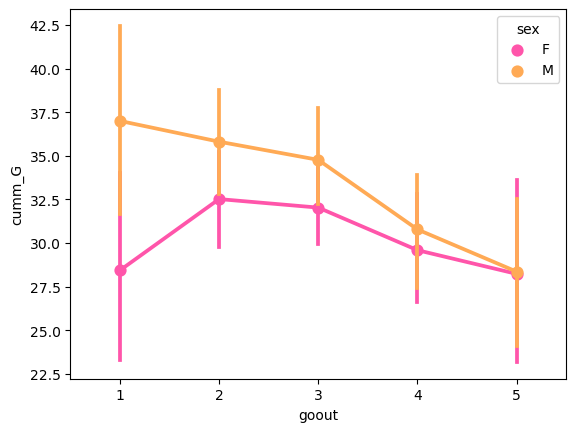

In [32]:
sns.pointplot(x="goout", y="cumm_G", hue="sex", data=df, palette="spring")
plt.show()
# Conclusion - Students who go out least scores much higher than those who go out for long hours.

<Axes: xlabel='goout', ylabel='cumm_G'>

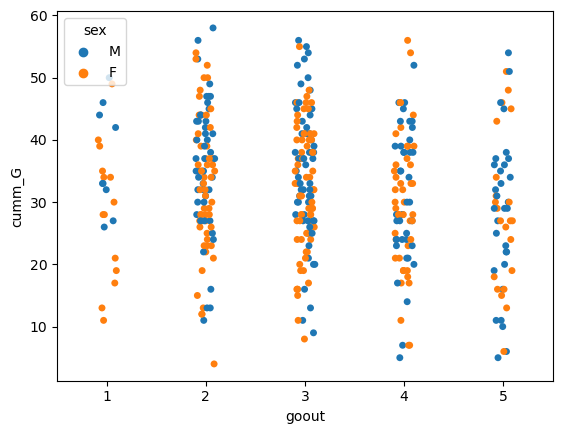

In [33]:
sns.stripplot(x='goout',y='cumm_G',data=df,hue='sex',jitter=True)
# Conclusion - Students who go out least scores much higher than those who go out for long hours and most of the students go out
#for three hours, very few students go out for a hour.

<h3>15. To analyze how family support and educational support can impact marks of students</h3>

<Axes: xlabel='famsup', ylabel='cumm_G'>

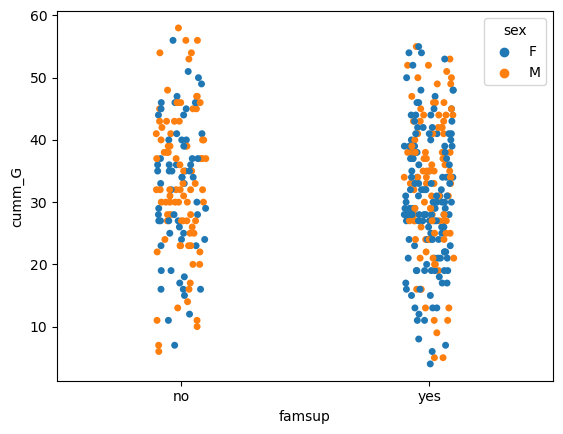

In [34]:
sns.stripplot(x='famsup',y='cumm_G',data=df,hue='sex',jitter=True)
# Conclusion - Most of the students have family support but those who don't have performed better in Math exam.

<Axes: xlabel='schoolsup', ylabel='cumm_G'>

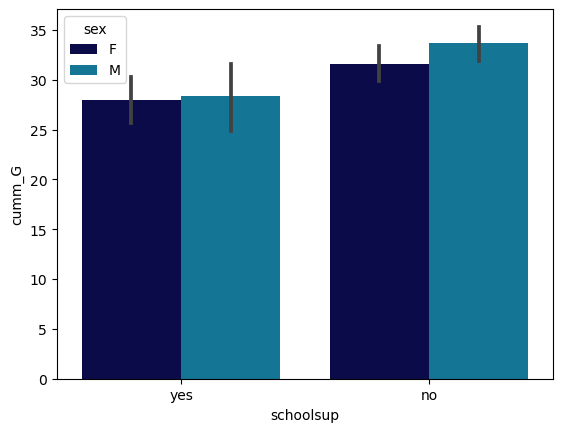

In [35]:
sns.barplot(x='schoolsup',y='cumm_G',data=df, hue='sex', palette = "ocean")
# Conclusion - Students who do not have educational support performed better in Math exam and especially female candidates.

<h3>16. To understand the relationship between family support, higher education and marks</h3>

<Axes: xlabel='higher', ylabel='famsup'>

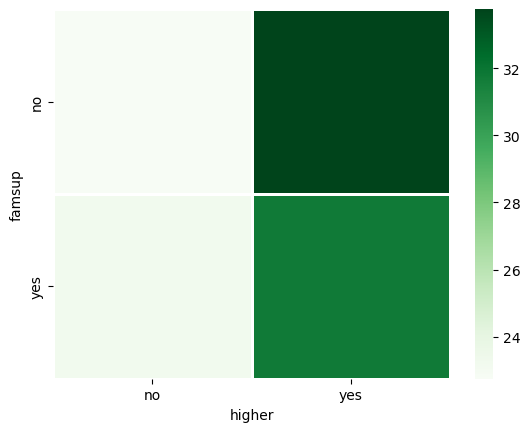

In [36]:
df12=df.pivot_table(index='famsup',columns='higher',values='cumm_G')
sns.heatmap(df12,linewidth=1, cmap = "Greens")
# Conclusion: 1. Those who do not have family support and not looking for higher education are scoring least in the Math exam.
# 2. Those who are not having family support but looking for higher education have the highest scores in Math exam.

<Axes: xlabel='higher', ylabel='cumm_G'>

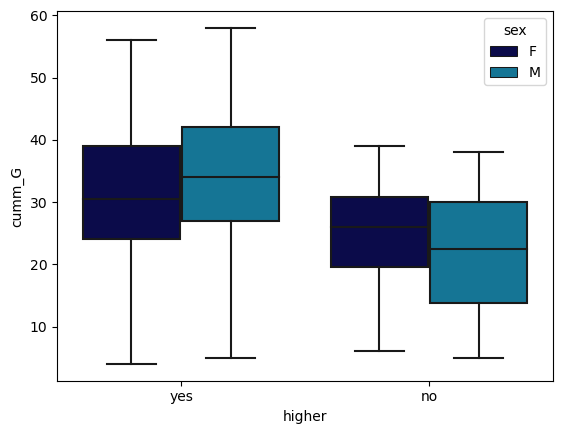

In [37]:
sns.boxplot(x='higher',y='cumm_G',hue='sex',data=df, palette = "ocean")
# Concluson - Those who are looking for higher edu. are performing much better than those who are not looking for higher edu.

<h3>17. To undestand the relationship between marks and absences</h3>

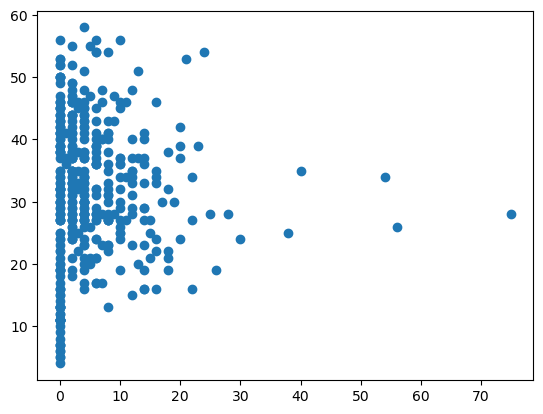

In [38]:
plt.scatter(x='absences',y='cumm_G',data=df)
plt.show()
# Conclusion - Most of the students have absences in range of 0-20, in a deacreasing order and students who are least absent in 
#in classes performed better than others.

<h3>18. To uderstand how failures can affect higher education</h3>

<Axes: xlabel='higher', ylabel='failures'>

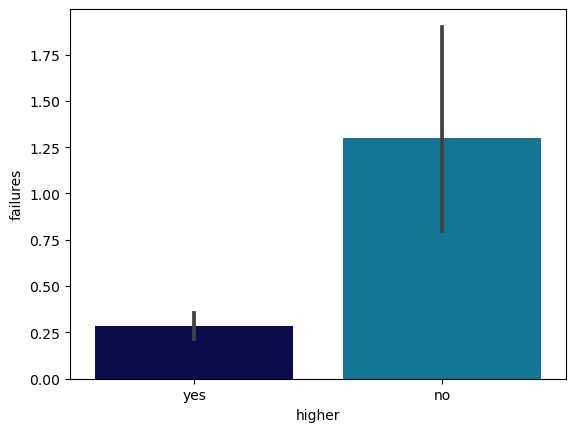

In [39]:
sns.barplot(x='higher',y='failures',data=df, palette = "ocean")
# Conclusion - Students who are are having high number of failures are not looking for higher education.

<h4>Interactive chart to understand the relationship in different ages by hovering the data</h4>

In [40]:
df20 = px.data.gapminder()
fig = px.bar(df, x='age', y='failures',
             hover_data=['absences', 'failures','G3'], color='higher',
              height=500)
fig.show()
# Conclusion: 1. Students are having less failures with the increase in age from 15-19 years.
# 2. Almost every student at the age of 15 and 16 look for higher education. 

<h2>Conclusions:</h2>
<h4>1. Scores are normally distributes and absences are right skewed.</h4>
<h4>2. Females are more than males in the dataset.</h4>
<h4>3. Students of GP school are performing better than MS school.</h4>
<h4>4. In GP school male students are performing better while in MS school female students are performing better.</h4>
<h4>5. Male students are performing better than female students.</h4>
<h4>6. Students in the age group of 15-18 are scoring more than the students in the age group of 19-22.</h4>
<h4>7. Students having family of less thant three members are performing slightly better.</h4>
<h4>8. Students whose parents are apart are performing slight better.</h4>
<h4>9. Students whose mother and father are least educated are scoring the most.</h4>
<h4>10. Students whose mother's job is in the health sector are getting higher marks mostly in the range of 40+ and class toppers are also those whose mother's job is in health sector.</h4>
<h4>11. Students whose father's job is in the teaching sector are getting higher marks mostly in the range of 40+ and class toppers are also those whose mother's job is in teaching sector.</h4>
<h4>12. Students whose father's job is in the teaching sector and mother's job is of a home maker are getting the least marks while Students whose father is a home maker and mother's job is in the health sector are scoring the highest marks.</h4>
<h4>13. Those who participate in activities and have internet access have the highest study hours while those who do not who do not have internet access and doesn't participate in activities have the least study hours.</h4>
<h4>14. Those who participate in activities and have internet access are scoring the highest marks while those who do not who do not have internet access and doesn't participate in activities are scoring the least.</h4>
<h4>15. Most of the students are studying for 2 hours but students who have more study hours are scoring higher.</h4>
<h4>16. Those who are not romantic but have good family relation are scoring the least marks.</h4>
<h4>17. Those who are romantic and have good family relation are scoring the highest marks.</h4>
<h4>18. Those who are not romantic and not have good family relation are having very absences in the class.</h4>
<h4>19. Those who are not romantic but have good family relation are having least absences in the class.</h4>
<h4>20. Students have least free time but go out for long hours, scores least in exams.</h4>
<h4>21. Most of the students have 3 hours of free time and those who have 2 hours of free time, scores higher in exams.</h4>
<h4>22. Students who go out least scores much higher than those who go out for long hours.</h4>
<h4>23. Students who go out least scores much higher than those who go out for long hours and most of the students go out for three hours, very few students go out for a hour.</h4>
<h4>24. Most of the students have family support but those who don't have performed better in Math exam.</h4>
<h4>25. Students who do not have educational support performed better in Math exam and especially female candidates.</h4>
<h4>26. Those who do not have family support and not looking for higher education are scoring least in the Math exam.</h4>
<h4>27. Those who are not having family support but looking for higher education have the highest scores in Math exam.</h4>
<h4>28. Those who are looking for higher edu. are performing much better that those who are not looking for higher edu.</h4>
<h4>29.  Most of the students have absences in range of 0-20, in a deacreasing order and students who are least absent in in classes performed better than others.</h4>
<h4>30. Students who are are having high number of failures are not looking for higher education.</h4>
<h4>31. Young students are having higher probabity of failures.</h4>
<h4>32. Almost every student at the age of 15 and 16 look for higher education.</h4>

<a name="Feature"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>6. Feature Engineering / Data Normalization</b>

In [41]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 cumm_G  
0        3     4     1     1       3        6   5   6   6     17  
1        3     3     1     1       3        4   5   5   6     16  
2        3     2     2     3       3       10   7   8  10     25  
3        2     2     1     1       5        2  15  14  15     44  
4        3     2     1     2       5        4   6  10  10     26  

[5 rows x 34 columns]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original data
df_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns with object data type
object_columns = ["school", "sex", "address","famsize", "Pstatus", "Mjob","Fjob","reason","guardian","schoolsup","famsup",
                 "paid","activities","nursery","higher","internet","romantic"]

# Apply label encoding to each object column
for col in object_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Now, all the object columns have been converted to integers
# You can check the data types to confirm
print(df_encoded.dtypes)

school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int64
studytime     int64
failures      int64
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
cumm_G        int64
dtype: object


In [44]:
df_encoded.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  cumm_G  
0         3      4     1     1       3         6   5   6   6      17  
1         3      3     1     1       3         4   5   5   6      16  
2         3      2     2     3       3        10   7   8  10      25  
3         2      2     1     1       5         2  15  14  15      44  
4         3      2     1     2       5         4   6  10  10      26  

[5 rows x 34 columns]

### Droping some less important columns

In [45]:
df_encoded.drop(['school','sex','Mjob','Fjob','cumm_G'],axis=1,inplace=True)

In [46]:
df_encoded.head()

age  address  famsize  Pstatus  Medu  Fedu  reason  guardian  traveltime  \
0   18        1        0        0     4     4       0         1           2   
1   17        1        0        1     1     1       0         0           1   
2   15        1        1        1     1     1       2         1           1   
3   15        1        0        1     4     2       1         1           1   
4   16        1        0        1     3     3       1         0           1   

   studytime  ...  famrel  freetime  goout  Dalc  Walc  health  absences  G1  \
0          2  ...       4         3      4     1     1       3         6   5   
1          2  ...       5         3      3     1     1       3         4   5   
2          2  ...       4         3      2     2     3       3        10   7   
3          3  ...       3         2      2     1     1       5         2  15   
4          2  ...       4         3      2     1     2       5         4   6   

   G2  G3  
0   6   6  
1   5   6  
2   8  10  
3  14  15  
4  10  10  

[5 rows x 29 columns]

In [47]:
df_encoded.iloc[328]

age           17
address        1
famsize        0
Pstatus        1
Medu           4
Fedu           4
reason         0
guardian       1
traveltime     1
studytime      3
failures       0
schoolsup      0
famsup         1
paid           1
activities     1
nursery        1
higher         1
internet       1
romantic       0
famrel         5
freetime       4
goout          4
Dalc           1
Walc           3
health         4
absences       7
G1            10
G2             9
G3             9
Name: 328, dtype: int64

### Correlation matrix

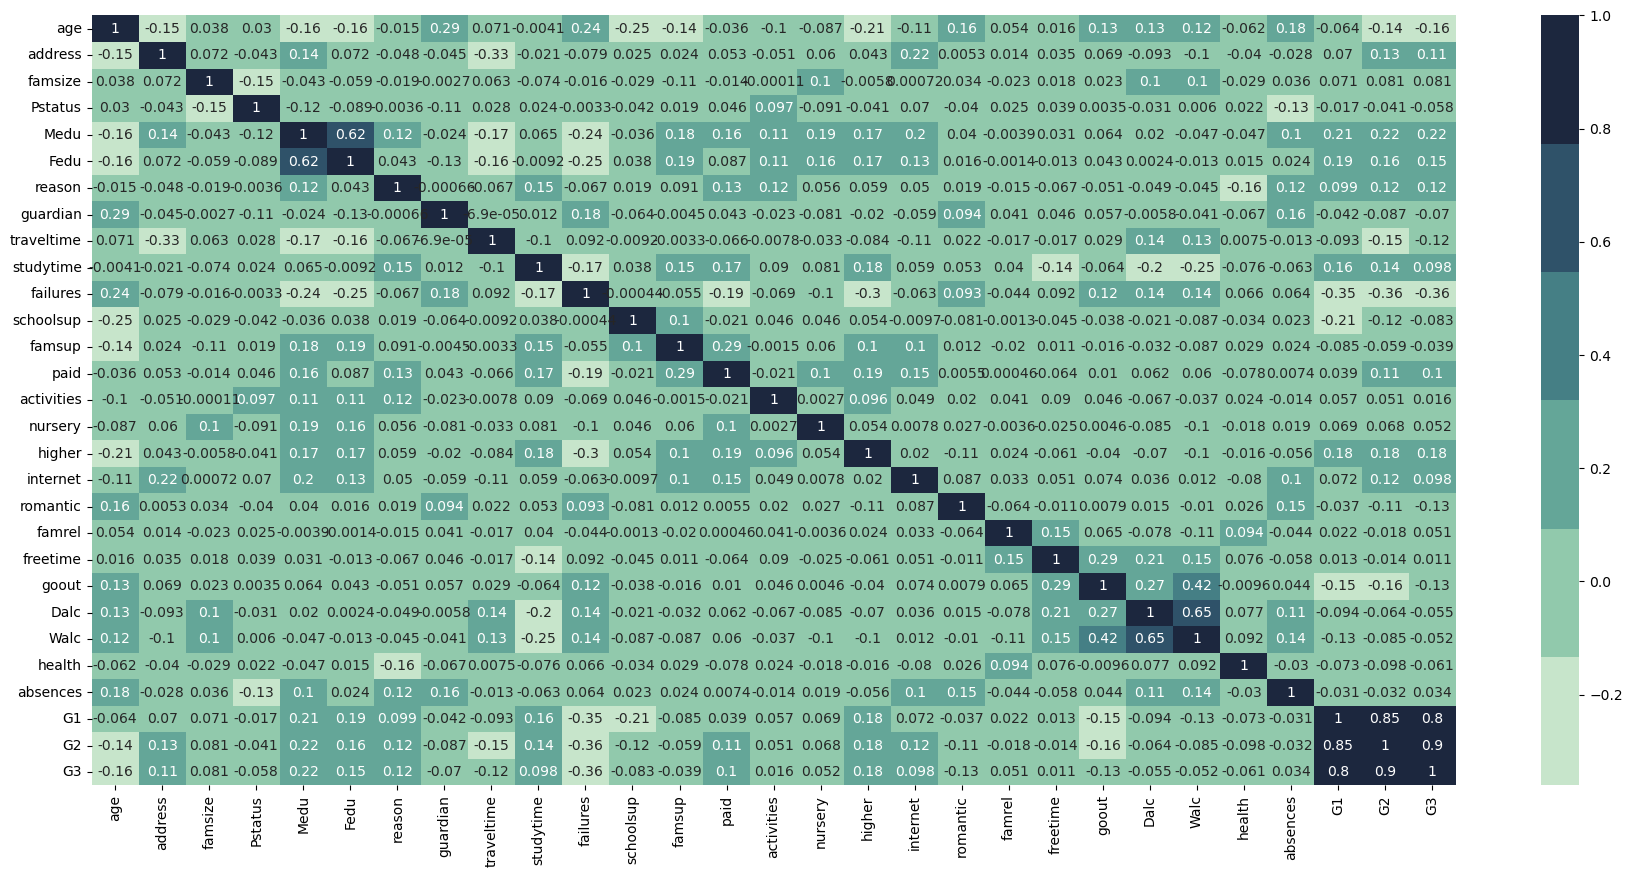

In [48]:
fig = plt.figure(figsize=[22,10])
    
sns.heatmap(df_encoded.corr(), annot=True, cmap=sns.cubehelix_palette(rot=-.4))

plt.show()

## Best Feature selection

In [49]:
import plotly.graph_objs as go
from sklearn.feature_selection import SelectKBest, chi2

df_new = df_encoded.copy()

# Extract features and labels
X = df_new.drop('G3', axis=1)
y = df_new['G3']

# Fit SelectKBest with chi2 score function
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# Calculate the sum of all feature scores
total_score = fit.scores_.sum()

# Calculate the percentage contribution of each feature to the total score
feature_scores_percentage = (fit.scores_ / total_score) * 100

# Create a DataFrame for feature scores and percentages
feature_score_percentage_df = pd.DataFrame({
    'feature': X.columns,
    'score': fit.scores_,
    'percentage': feature_scores_percentage
})

# Sort the DataFrame by percentage in descending order
feature_score_percentage_df.sort_values(by='percentage', ascending=False, inplace=True)

# Display the top 20 features and their percentages
top_features_df = feature_score_percentage_df.head(22)
print(top_features_df)

# Visualize the results as a bar chart
fig = go.Figure(go.Bar(
    x=top_features_df['percentage'],
    y=top_features_df['feature'],
    orientation='h'))

fig.update_layout(
    title="Top 20 Features by Percentage Contribution",
    height=1200,
    showlegend=False,
)

fig.show()


       feature       score  percentage
25    absences  648.166848   35.774444
27          G2  451.680952   24.929746
26          G1  319.716427   17.646193
10    failures  140.934898    7.778657
6       reason   29.724125    1.640571
23        Walc   28.444167    1.569926
11   schoolsup   28.319018    1.563019
18    romantic   20.089526    1.108807
22        Dalc   17.082868    0.942859
13        paid   16.129900    0.890262
4         Medu   13.894852    0.766902
2      famsize   12.429690    0.686035
21       goout   10.472494    0.578011
5         Fedu   10.375563    0.572661
24      health   10.176668    0.561684
14  activities    7.601049    0.419527
8   traveltime    6.758151    0.373004
9    studytime    6.231603    0.343943
1      address    5.876113    0.324322
12      famsup    5.303438    0.292714
20    freetime    4.479465    0.247236
7     guardian    4.297163    0.237174


<a name="Modelling"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>7. Model Building</b>

### Data splitting

In [50]:
from sklearn.model_selection import train_test_split #To split data
from sklearn.preprocessing import StandardScaler #For Scaling
from sklearn.ensemble import RandomForestClassifier# Algorithms for predictions
from sklearn.neighbors import KNeighborsClassifier #Algorithms for prediction
from sklearn.linear_model import LogisticRegression #Algorithms for predictions
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix #For evaluating built models
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import tensorflow as tf

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow.keras.utils as np_utils  # Importing from tensorflow.keras.utils


In [52]:
X=df_encoded.drop('G3',axis=1)
y=df_encoded['G3']

In [53]:
X.shape, y.shape

((395, 28), (395,))

### Augmentation of Dataset

We augment (that is increase the number of dataset) the dataset to enhance the accuracy of the prediction

In [57]:
from sklearn.utils import shuffle

# Step 1: Define augmentation settings
augmentation_factor = 5  # Number of augmented samples to generate per original sample

# Step 2: Data Augmentation
def augment_data(X, y, factor):
    augmented_data = []
    augmented_labels = []

    for i in range(len(X)):
        original_sample = X.iloc[i].values  # Convert the row to a NumPy array
        original_label = y.iloc[i]         # y is a Series, so no need to convert it

        # Add original data to augmented samples
        augmented_data.append(original_sample)
        augmented_labels.append(original_label)

        # Generate additional augmented samples
        for _ in range(factor - 1):
            
            # Apply data augmentation techniques here
            augmented_sample = original_sample + np.random.normal(0, 0.1, size=original_sample.shape)
            augmented_label = original_label

            augmented_data.append(augmented_sample)
            augmented_labels.append(augmented_label)

    return np.array(augmented_data), np.array(augmented_labels)

# Call the augment_data function
augmented_X, augmented_y = augment_data(X, y, augmentation_factor)

# Shuffle the augmented data and labels
augmented_X, augmented_y = shuffle(augmented_X, augmented_y, random_state=42)



In [58]:
#Checking the shape of the augmented dataset
print("Augmented X shape:", augmented_X.shape)
print("Augmented y shape:", augmented_y.shape)


Augmented X shape: (1975, 28)
Augmented y shape: (1975,)


In [59]:
#train test split for model training and validation
X_train, X_test, y_train, y_test = train_test_split(augmented_X, augmented_y, test_size = 0.2, random_state = 42)

In [60]:
X_test

array([[14.89404279,  1.00615222,  0.1001207 , ...,  2.03079866,
        11.95615821, 12.02596002],
       [16.0716159 ,  1.09452009, -0.21728836, ...,  6.05791372,
         7.12637988,  9.71788982],
       [16.12943842,  1.0689777 ,  0.02978034, ...,  4.03221862,
         7.85494283,  9.87929189],
       ...,
       [15.94401427,  0.97837889, -0.06536938, ..., -0.15594986,
         7.8906851 ,  6.98973978],
       [17.07626869, -0.1455514 ,  0.10282696, ..., 18.1566156 ,
         7.13243915,  6.05041839],
       [17.04276821,  1.2546167 ,  0.09118565, ..., 10.08345215,
        16.01668348, 14.93244033]])

In [61]:
y_test

array([11, 10, 10, 11, 15, 10, 10,  7, 18, 13, 13, 15, 11, 16, 10, 13, 15,
       10,  8,  5, 11,  0,  8, 10, 15, 10, 18, 14, 14, 10, 12, 11,  9, 10,
        8, 14, 11,  8,  9, 11, 15, 14, 13, 15, 11, 14, 11, 14, 11,  9,  0,
       18, 10, 12,  5,  8, 14, 15, 10,  9, 11, 14, 12, 19, 19, 11, 16, 18,
       11,  0,  0,  8, 16,  0,  9, 10,  8, 11,  7,  5, 18,  9,  8,  0,  0,
        9, 11,  8,  9, 17, 16,  7, 13,  6, 13, 11, 10,  8, 15,  8, 15,  6,
        8, 13, 12, 12, 14, 15,  6, 13, 15,  8, 12, 15, 11, 10, 11, 15, 10,
       13, 11,  9, 16, 15, 14, 10,  0, 10, 14,  0, 13, 14,  0, 16, 10, 15,
        9, 11,  6, 11,  7, 10, 16,  6, 12, 11,  8, 18, 14,  6,  9,  0, 18,
       17, 11,  8, 11, 11, 11,  9, 16, 10, 10, 12,  8, 14, 12, 11, 11, 12,
        7,  9, 11,  0,  5,  5, 13, 13, 11, 16,  9, 15, 13, 19, 16, 12, 14,
       10, 13, 14, 17, 10, 10, 13,  8, 11, 16,  0,  9, 15, 11, 10,  5, 18,
       15, 13, 14,  0,  8,  0, 14,  5, 12,  7, 11, 16,  8,  8, 10, 12, 12,
       15, 18, 13, 12, 15

In [74]:
# Check the distribution of the target variable using NumPy
unique_classes, counts = np.unique(y_train, return_counts=True)

# Print the unique classes and their counts
for cls, count in zip(unique_classes, counts):
    print(f"Class {cls}: {count} samples")

Class 0: 169 samples
Class 4: 5 samples
Class 5: 23 samples
Class 6: 61 samples
Class 7: 37 samples
Class 8: 130 samples
Class 9: 114 samples
Class 10: 229 samples
Class 11: 177 samples
Class 12: 125 samples
Class 13: 119 samples
Class 14: 106 samples
Class 15: 130 samples
Class 16: 62 samples
Class 17: 23 samples
Class 18: 45 samples
Class 19: 21 samples
Class 20: 4 samples


## ANN Modelling

In [66]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Balancing the dataset using Oversampling method

In [72]:
# Oversample the minority classes using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)

# Fit and resample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Building the model

In [87]:
# Build and train the ANN model with the resampled data
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train_resampled.shape[1]))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=num_classes, activation='softmax'))

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = ann_model.fit(X_train_resampled, np_utils.to_categorical(y_train_resampled, num_classes=num_classes),
                    validation_data=(X_test, y_test_onehot),
                    batch_size=16, epochs=100)


Epoch 1/100
258/258 [==============================] - 4s 5ms/step - loss: 2.4960 - accuracy: 0.2137 - val_loss: 2.2061 - val_accuracy: 0.2076
Epoch 2/100
258/258 [==============================] - 1s 4ms/step - loss: 1.6368 - accuracy: 0.4386 - val_loss: 1.6343 - val_accuracy: 0.4203
Epoch 3/100
258/258 [==============================] - 1s 4ms/step - loss: 1.3089 - accuracy: 0.5325 - val_loss: 1.4873 - val_accuracy: 0.4430
Epoch 4/100
258/258 [==============================] - 1s 4ms/step - loss: 1.1392 - accuracy: 0.5919 - val_loss: 1.3001 - val_accuracy: 0.5392
Epoch 5/100
258/258 [==============================] - 1s 4ms/step - loss: 1.0249 - accuracy: 0.6291 - val_loss: 1.1186 - val_accuracy: 0.6177
Epoch 6/100
258/258 [==============================] - 1s 4ms/step - loss: 0.9603 - accuracy: 0.6596 - val_loss: 1.0522 - val_accuracy: 0.6380
Epoch 7/100
258/258 [==============================] - 1s 3ms/step - loss: 0.8607 - accuracy: 0.6917 - val_loss: 0.9821 - val_accuracy: 0.6608

### Evaluate the model on test data

In [88]:
# Evaluate the model on test data
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test_onehot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

13/13 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9924
Test Loss: 0.03185680881142616
Test Accuracy: 0.9924050569534302


In [89]:
# Evaluate the model using appropriate metrics
y_pred = ann_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

13/13 [==============================] - 0s 2ms/step
Accuracy: 0.9924050632911392
F1 Score: 0.9923960163147141


### Plotting the Graphs for accuracy and loss

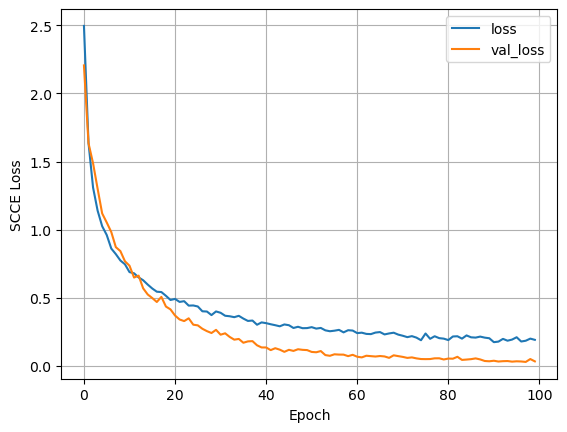

In [91]:
import matplotlib.pyplot as plt

# Graph for the loss.
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)
plt.show()


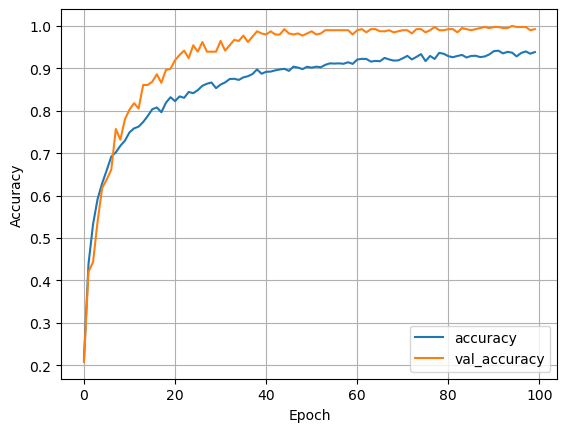

In [90]:
# Accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Saving the Model

In [80]:
# Save the Keras model
ann_model.save('ANN_model_9.keras')


C:\Users\ADMIN\anaconda3_new\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
# Save the model as h5
ann_model.save('ANN_model_9.h5')

In [ ]:
# Optionally, you can also save the model architecture and weights separately:
# Save the model architecture to a JSON file
model_json = ann_model.to_json()
with open("ANN_model_9.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to a separate file
ann_model.save_weights("ANN_model_9_weights.h5")